In [1]:
import numpy as np

X_train_path = '../Iris/train/x.txt'
y_train_path = '../Iris/train/y.txt'
X_test_path = '../Iris/test/x.txt'
y_test_path = '../Iris/test/y.txt'

def make_dataset(X_path, y_path):
    x_ori = np.loadtxt(X_path)
    x_ori_std = np.std(x_ori, axis=0)
    x_ori_mean = np.mean(x_ori, axis=0)
    x_tmp = (x_ori - x_ori_mean) / x_ori_std

    X_aug = np.concatenate([x_tmp, np.ones((x_tmp.shape[0], 1))], axis=1)
    y = np.loadtxt(y_path)
    y = y.reshape(-1, 1)

    return X_aug, y

X_train, y_train = make_dataset(X_train_path, y_train_path)
X_test, y_test = make_dataset(X_test_path, y_test_path)

C:\Users\13476\AppData\Local\Temp\ipykernel_21236\3348161704.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.get_cmap('flag',3))
C:\Users\13476\AppData\Local\Temp\ipykernel_21236\3348161704.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.get_cmap('flag',3))


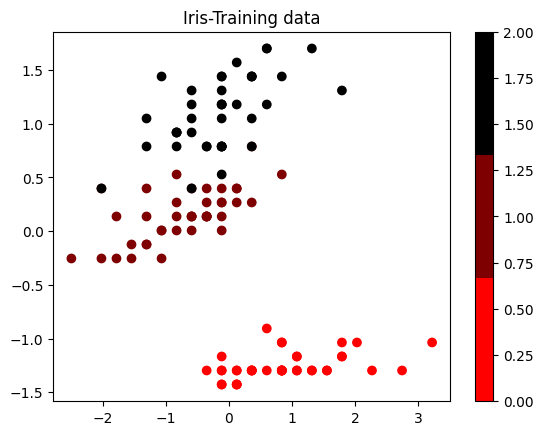

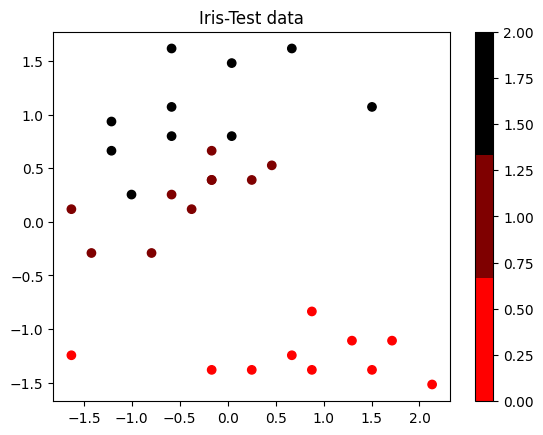

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.get_cmap('flag',3))
plt.title('Iris-Training data')
plt.colorbar()

plt.figure()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.get_cmap('flag',3))
plt.title('Iris-Test data')
plt.colorbar()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 3)
(120, 1)
(30, 3)
(30, 1)


In [4]:
from classifiers.loss_function import softmax_loss_native
import time

num_sample = X_train.shape[1]
num_class = np.max(y_train).astype(int) + 1

W = np.random.randn(num_sample, num_class) * 0.001
# print(W)
loss, grad = softmax_loss_native(W, X_train, y_train, reg=0.0)

print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 0.009227
sanity check: 2.302585


In [5]:
from classifiers.linear_classifier import Softmax

results = {}
best_test = -1
best_softmax = None
learning_rates = [1e-2, 1e-3, 1e-4, 1e-5, 5e-5, 1e-6]
regularization_strengths = [0, 1e-1, 1, 10, 100, 500, 1000]

for lr in learning_rates:
    for rs in regularization_strengths:
        softmax = Softmax()
        softmax.train(X_train, y_train, learning_rate=lr, reg=rs,\
                       decay=1.0, num_iters=500, batch_size=30, verbose=True)
        
        y_train_pred = softmax.predict(X_train)
        acc_train = np.mean(y_train == y_train_pred)

        y_test_pred = softmax.predict(X_test)
        acc_test = np.mean(y_test == y_test_pred)
        results[(lr, rs)] = (acc_train, acc_test)

        if acc_test > best_test:
            best_test = acc_test
            best_softmax = softmax

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f'\
          % (lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % (best_test))

itearnation 0 / 500 : loss 1.135927
itearnation 100 / 500 : loss 1.113387
itearnation 200 / 500 : loss 1.115164
itearnation 300 / 500 : loss 1.110018
itearnation 400 / 500 : loss 1.107569
itearnation 0 / 500 : loss 1.126047
itearnation 100 / 500 : loss 1.177593
itearnation 200 / 500 : loss 1.329330
itearnation 300 / 500 : loss 1.554836
itearnation 400 / 500 : loss 1.828815
itearnation 0 / 500 : loss 1.133694
itearnation 100 / 500 : loss 1.373439
itearnation 200 / 500 : loss 1.601748
itearnation 300 / 500 : loss 1.702196
itearnation 400 / 500 : loss 1.741723
itearnation 0 / 500 : loss 1.147058
itearnation 100 / 500 : loss 1.165303
itearnation 200 / 500 : loss 1.165588
itearnation 300 / 500 : loss 1.165395
itearnation 400 / 500 : loss 1.165516
itearnation 0 / 500 : loss 1.138090
itearnation 100 / 500 : loss 1.105565
itearnation 200 / 500 : loss 1.105766
itearnation 300 / 500 : loss 1.106198
itearnation 400 / 500 : loss 1.105619
itearnation 0 / 500 : loss 1.137224
itearnation 100 / 500 : 

d:\Desktop\AI-ML-methods\homework\assignment2\src\classifiers\loss_function.py:65: RuntimeWarning: overflow encountered in scalar multiply
  loss = loss / N + 0.5 * reg * np.sum(W * W)
d:\Desktop\AI-ML-methods\homework\assignment2\src\classifiers\loss_function.py:65: RuntimeWarning: overflow encountered in multiply
  loss = loss / N + 0.5 * reg * np.sum(W * W)
d:\Code\Anaconda\envs\myenv\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
d:\Code\Anaconda\envs\myenv\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
d:\Desktop\AI-ML-methods\homework\assignment2\src\classifiers\loss_function.py:66: RuntimeWarning: overflow encountered in multiply
  dW = dW / N + reg * W


itearnation 200 / 500 : loss 1.152969
itearnation 300 / 500 : loss 1.160032
itearnation 400 / 500 : loss 1.163412
itearnation 0 / 500 : loss 1.124293
itearnation 100 / 500 : loss 1.105290
itearnation 200 / 500 : loss 1.105283
itearnation 300 / 500 : loss 1.105297
itearnation 400 / 500 : loss 1.105296
itearnation 0 / 500 : loss 1.126225
itearnation 100 / 500 : loss 1.099969
itearnation 200 / 500 : loss 1.099963
itearnation 300 / 500 : loss 1.099969
itearnation 400 / 500 : loss 1.099967
itearnation 0 / 500 : loss 1.129284
itearnation 100 / 500 : loss 1.099287
itearnation 200 / 500 : loss 1.099307
itearnation 300 / 500 : loss 1.099336
itearnation 400 / 500 : loss 1.099279
itearnation 0 / 500 : loss 1.127986
itearnation 100 / 500 : loss 1.124004
itearnation 200 / 500 : loss 1.130164
itearnation 300 / 500 : loss 1.123067
itearnation 400 / 500 : loss 1.128398
itearnation 0 / 500 : loss 1.130757
itearnation 100 / 500 : loss 1.140109
itearnation 200 / 500 : loss 1.149441
itearnation 300 / 500 

itearnation 0 / 800 : loss 1.152857
itearnation 100 / 800 : loss 1.127120
itearnation 200 / 800 : loss 1.122470
itearnation 300 / 800 : loss 1.124812
itearnation 400 / 800 : loss 1.127234
itearnation 500 / 800 : loss 1.125373
itearnation 600 / 800 : loss 1.127122
itearnation 700 / 800 : loss 1.124391
Accuracy in training data: 0.3333333333333333
Accuracy in testing data: 0.3333333333333333


C:\Users\13476\AppData\Local\Temp\ipykernel_21236\1363914535.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  fig.scatter(X[:, 0], X[:, 1], c=y, marker='x', cmap=plt.cm.get_cmap('flag'))
C:\Users\13476\AppData\Local\Temp\ipykernel_21236\1363914535.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  fig.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.get_cmap('prism'))


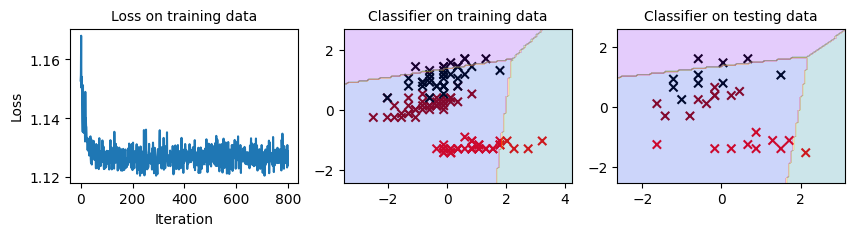

In [12]:
from classifiers.linear_classifier import Softmax
import matplotlib.pyplot as plt

lr = 0.001
reg = 50
decay = 0.95
num_iters=800
bz = 40
softmax = Softmax()
loss_history = softmax.train(X_train, y_train, 
                             learning_rate=lr, reg=reg, decay=decay, 
                             batch_size=bz, num_iters=num_iters, verbose=True)
                
y_train_pred = softmax.predict(X_train)
acc_train = np.mean(y_train == y_train_pred)

y_test_pred = softmax.predict(X_test)
acc_test = np.mean(y_test == y_test_pred)

fig = plt.figure(figsize=(10, 2))
ax = fig.subplots(1, 3)
ax[0].set_title('Loss on training data', fontsize=10)
ax[1].set_title('Classifier on training data', fontsize=10)
ax[2].set_title('Classifier on testing data', fontsize=10)

ax[0].plot(loss_history)
ax[0].set_xlabel('Iteration', fontsize=10)
ax[0].set_ylabel('Loss', fontsize=10)
print(f'Accuracy in training data: {acc_train}')

def classifier_visualization(W, X, y, fig):
    fig.scatter(X[:, 0], X[:, 1], c=y, marker='x', cmap=plt.cm.get_cmap('flag'))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    X_grid = np.concatenate([xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1), 
                                np.ones((len(xx.ravel()), 1))], axis=1)
    Z = softmax.predict(X_grid)
    Z = Z.reshape(xx.shape)
    fig.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.get_cmap('prism'))
    # fig.set_title('Classifier visualization')

classifier_visualization(softmax.W, X_train, y_train, ax[1])
classifier_visualization(softmax.W, X_test, y_test, ax[2])
print(f'Accuracy in testing data: {acc_test}')
plt.show()